In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import nltk
# nltk.download('maxent_ne_chunker')
# nltk.download('stopwords')
# nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
df = pd.read_csv(r"archive\amazon_alexa.tsv",delimiter = '\t', quoting = 3)
print(f"Dataset shape: {df.shape}")

Dataset shape: (3150, 5)


In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df['verified_reviews'].values[6]

'"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet."'

In [5]:
df['rating'].values[6]


3

In [6]:
df['feedback'].values[6]

1

In [7]:
df = df.head(1500)
# print(df.shape) #shape determines the number of rows and columns
df.shape

(1500, 5)

rating
1      80
2      44
3      65
4     210
5    1101
Name: count, dtype: int64


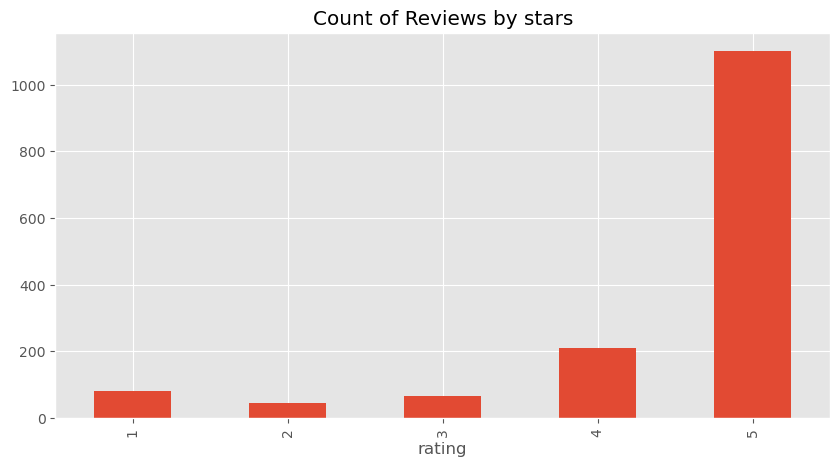

In [8]:
#value_counts() counts the number of values of each key value
print(df['rating'].value_counts().sort_index())
ax = df['rating'].value_counts().sort_index().plot(kind='bar', title = 'Count of Reviews by stars', figsize=(10,5))

In [9]:
#Basic NLTK
example = df['verified_reviews'][35] 
print(example)

I bought this to compare the speaker quality to our first generation speaker and i like the sound better.  I will ship this to my daughter though because I like the fact that my first generation has a chargeable base that we bought which keeps it more mobile and she needs a better sound than what she has now.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I',
 'bought',
 'this',
 'to',
 'compare',
 'the',
 'speaker',
 'quality',
 'to',
 'our']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('bought', 'VBD'),
 ('this', 'DT'),
 ('to', 'TO'),
 ('compare', 'VB'),
 ('the', 'DT'),
 ('speaker', 'NN'),
 ('quality', 'NN'),
 ('to', 'TO'),
 ('our', 'PRP$')]

In [12]:
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  I/PRP
  bought/VBD
  this/DT
  to/TO
  compare/VB
  the/DT
  speaker/NN
  quality/NN
  to/TO
  our/PRP$
  first/JJ
  generation/NN
  speaker/NN
  and/CC
  i/NN
  like/IN
  the/DT
  sound/NN
  better/RBR
  ./.
  I/PRP
  will/MD
  ship/VB
  this/DT
  to/TO
  my/PRP$
  daughter/NN
  though/IN
  because/IN
  I/PRP
  like/VBP
  the/DT
  fact/NN
  that/IN
  my/PRP$
  first/JJ
  generation/NN
  has/VBZ
  a/DT
  chargeable/JJ
  base/NN
  that/IN
  we/PRP
  bought/VBD
  which/WDT
  keeps/VBZ
  it/PRP
  more/RBR
  mobile/JJ
  and/CC
  she/PRP
  needs/VBZ
  a/DT
  better/JJR
  sound/NN
  than/IN
  what/WP
  she/PRP
  has/VBZ
  now/RB
  ./.)


In [13]:
#VADER Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
# import nltk


In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
print(sia.polarity_scores('I am so happy.'))
print(sia.polarity_scores('I am so happy'))
print(sia.polarity_scores('I am so happy!'))
print(sia.polarity_scores('I am so happy'))


{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}
{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}


In [16]:
print(sia.polarity_scores('I am so sad.'))

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}


In [17]:
print(sia.polarity_scores('example'))
print(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I bought this to compare the speaker quality to our first generation speaker and i like the sound better.  I will ship this to my daughter though because I like the fact that my first generation has a chargeable base that we bought which keeps it more mobile and she needs a better sound than what she has now.


In [18]:
#run the polarity score on the entire dataset
res = {}
myid = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['verified_reviews'])
    if not text == 'nan':
        res[myid] = sia.polarity_scores(text)
        myid+=1
#     break

  0%|          | 0/1500 [00:00<?, ?it/s]

In [19]:
# pd.DataFrame(res) displays the data in horizontal way
vaders = pd.DataFrame(res).T
# vaders.reset_index().rename(columns={'index':'Id'})
vaders = pd.concat([vaders,df],axis=1)

In [20]:
vaders

,neg,neu,pos,compound,rating,date,variation,verified_reviews,feedback
0,0.000,0.308,0.692,0.6696,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,0.000,0.193,0.807,0.6360,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,0.102,0.784,0.114,-0.1280,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,0.000,0.670,0.330,0.8957,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,0.000,1.000,0.000,0.0000,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...,...,...,...,...
1495,0.000,0.891,0.109,0.4215,5,30-Jul-18,Black Show,"""Love it! Great to request music and be able ...",1
1496,0.000,0.621,0.379,0.7959,4,30-Jul-18,Black Show,What we liked most was actually seeing the wor...,1
1497,0.000,0.385,0.615,0.4926,5,30-Jul-18,White Show,"""I’m just learning about this product, but wha...",1
1498,0.000,1.000,0.000,0.0000,5,30-Jul-18,Black Show,Easy to use!,1


In [21]:
# df['verified_reviews'][1500]

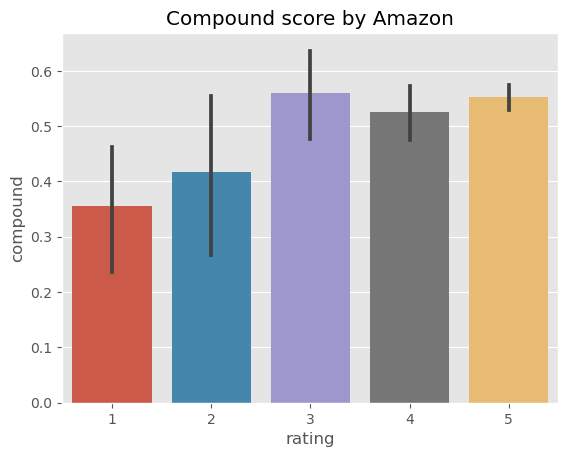

In [22]:
ax = sns.barplot(data=vaders, x='rating',y='compound')
ax.set_title("Compound score by Amazon")
plt.show()

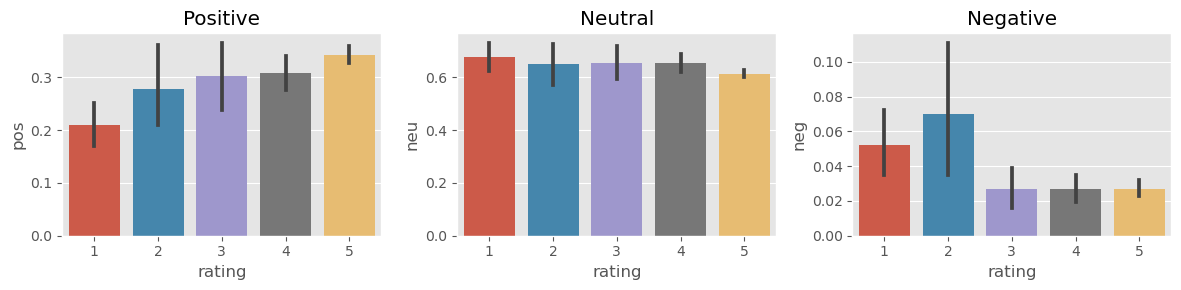

In [23]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='rating', y='pos',ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

In [24]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
# model = f"Model/xgboost.pkl"
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model)
model_ = AutoModelForSequenceClassification.from_pretrained(model)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
print(example)
sia.polarity_scores(example)

I bought this to compare the speaker quality to our first generation speaker and i like the sound better.  I will ship this to my daughter though because I like the fact that my first generation has a chargeable base that we bought which keeps it more mobile and she needs a better sound than what she has now.


{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.8689}

In [28]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model_(**encoded_text)
score = output[0][0].detach().numpy()
score = softmax(score)

In [29]:
score_dict = {
    'roberta_neg':score[0],
    'roberta_neu':score[1],
    'roberta_pos':score[2]
}
print(score_dict)

{'roberta_neg': 0.022355365, 'roberta_neu': 0.2038764, 'roberta_pos': 0.77376825}


In [74]:
def roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model_(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
    'roberta_neg':score[0],
    'roberta_neu':score[1],
    'roberta_pos':score[2]
    }
    positive = score_dict['roberta_pos']
    negative = score_dict['roberta_neg']
    neutral = score_dict['roberta_neu']
    if(positive>neutral and positive>negative):
        return "Positive response"
    elif(neutral>positive and neutral>negative):
        return "Neutral response"
    else:
        return "Negative response"
    print(positive, negative, neutral)
    return score_dict
    
# roberta("evening")

'Neutral response'

In [31]:
res = {}
myid = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = str(row['verified_reviews'])
        #     myid = row['Id']
        if not text == 'nan':
            vader_result = sia.polarity_scores(text)
            roberta_result = roberta(text)
            both = vader_result | roberta_result
            res[myid]=both
        myid+=1
    except RuntimeError:
        print(f"broke at {myid}")

  0%|          | 0/1500 [00:00<?, ?it/s]

broke at 1322


In [32]:
# print(vader_result)
print(both)
# print(roberat_result)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'roberta_neg': 0.034892753, 'roberta_neu': 0.73011667, 'roberta_pos': 0.23499058}


In [33]:
result_df = pd.DataFrame(res).T
result_df = pd.concat([result_df,df],axis=1)


In [34]:
result_df.head()

,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,rating,date,variation,verified_reviews,feedback
0,0.000,0.308,0.692,0.6696,0.003569,0.012840,0.983591,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,0.000,0.193,0.807,0.6360,0.005555,0.020416,0.974029,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,0.102,0.784,0.114,-0.1280,0.057281,0.459422,0.483297,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,0.000,0.670,0.330,0.8957,0.002916,0.026110,0.970974,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,0.000,1.000,0.000,0.0000,0.051007,0.408813,0.540181,5,31-Jul-18,Charcoal Fabric,Music,1


In [35]:
result_df.columns

Index(['neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'rating', 'date', 'variation', 'verified_reviews',
       'feedback'],
      dtype='object')

C:\Users\Sanjay Sahoo\Anaconda\installation\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


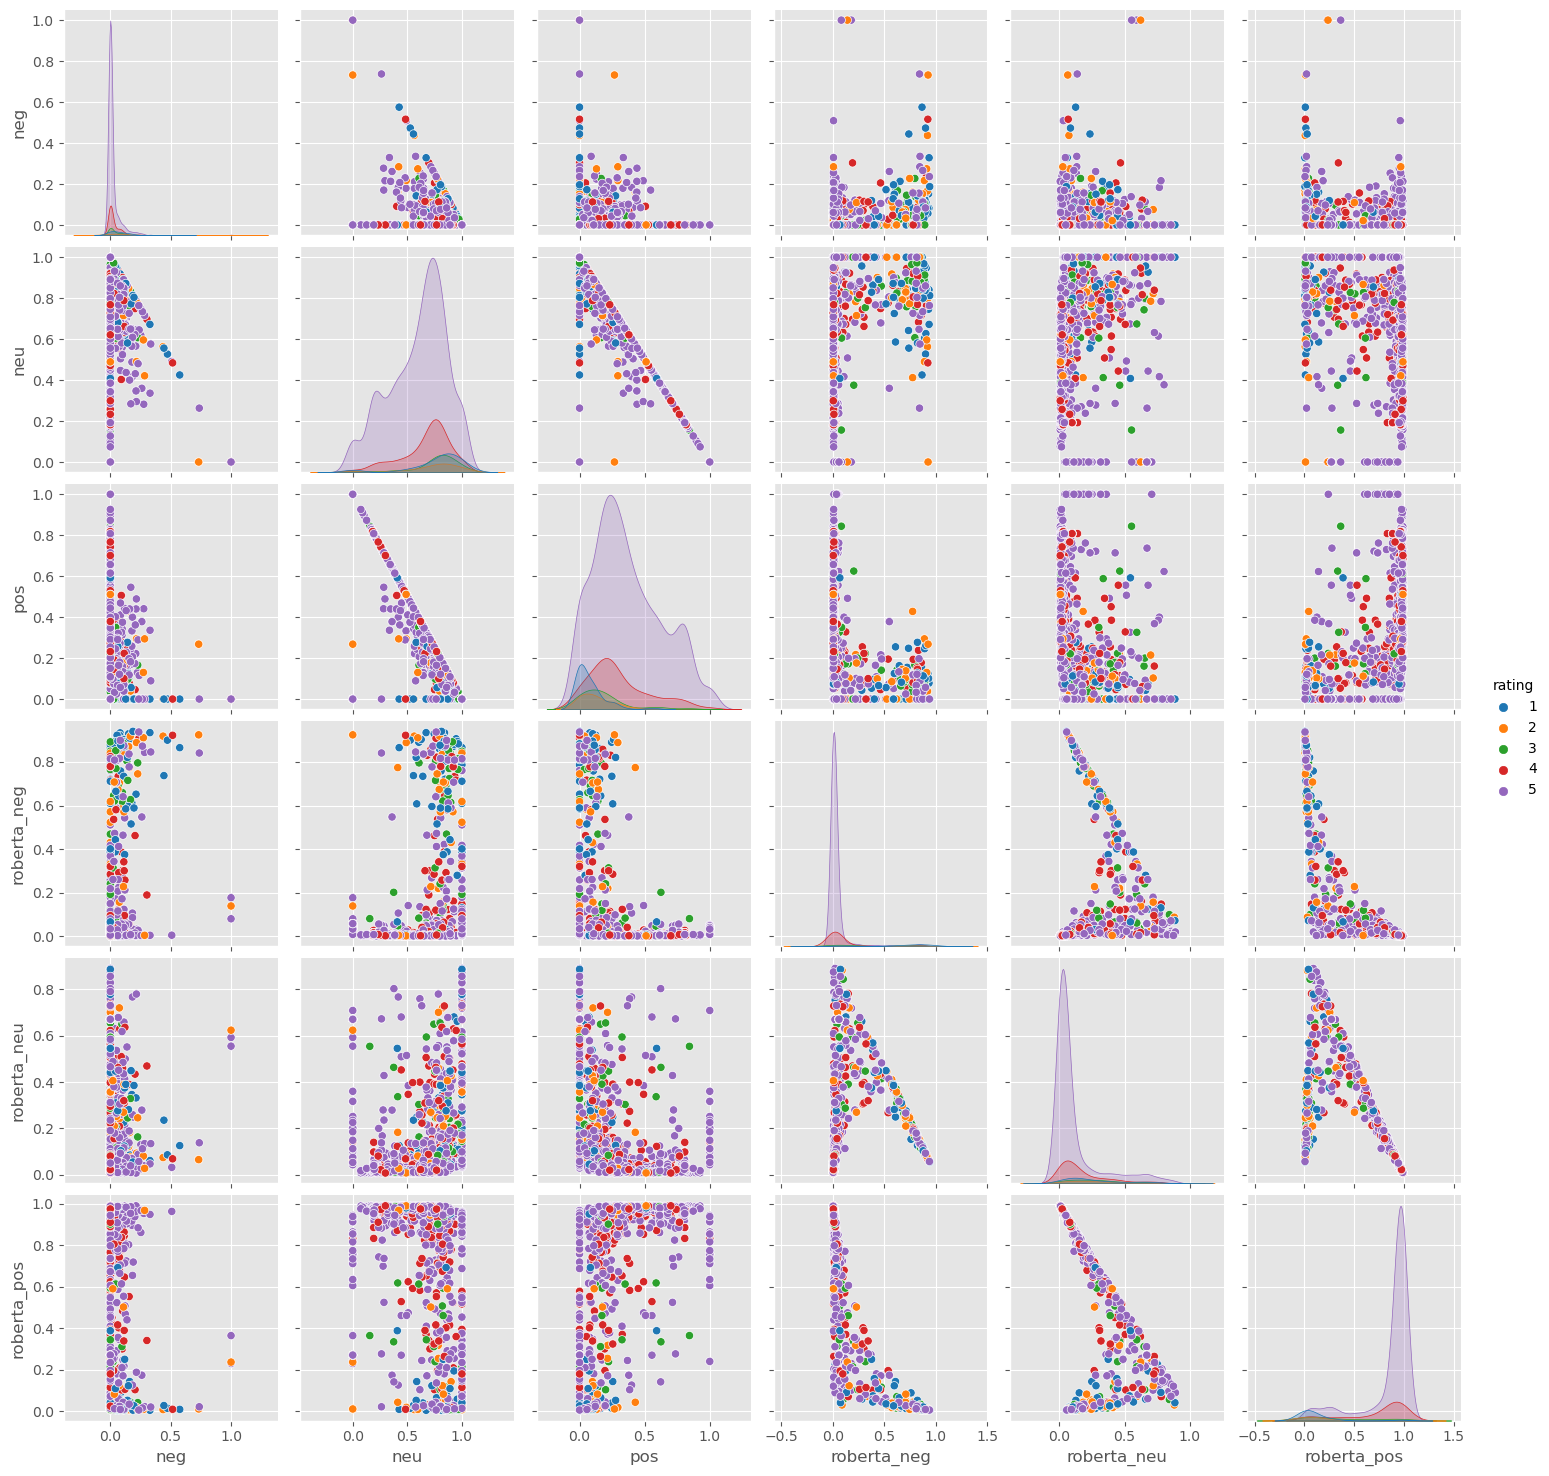

In [36]:
sns.pairplot(data=result_df, vars =['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],hue='rating',palette='tab10')
plt.show()

In [37]:
 result_df.query('rating == 1').sort_values('roberta_pos', ascending=False)['verified_reviews']

1389                                                     
1448    "Don't waste your money.  I own an echo gen 1,...
1340    Get rid of the &#34;Thongs To Try&#34; screen!...
1348    Can't turn of &#34;things to try&#34; on the s...
1352    "The product is attractive and somewhat useful...
                              ...                        
562     Bought 2 and both quit connecting to wifi and ...
361     This thing barely works. You have to select 3r...
1252    "This product is a complete waste of money. Wh...
567     "Very bad this device, I don’t know if it’s be...
521     "Two weeks after setting it up it no longer wo...
Name: verified_reviews, Length: 80, dtype: object

In [38]:
 result_df.query('rating == 5').sort_values('roberta_pos', ascending=False)['verified_reviews']

604     I purchased this for my daughter and we all lo...
231     "I love my Echo show!  and now i have this in ...
926     "I love my Echo show!  and now i have this in ...
1341    "Have not used it yet. But I'm sure it's as gr...
1117    Love it!! Super fun! Easy to use! My three yea...
                              ...                        
1491    We love it!!  We use it every day and are find...
894     As described and received on time.  Do not lik...
199     As described and received on time.  Do not lik...
1486                                           I love it.
1499                            it does what it needs to.
Name: verified_reviews, Length: 1101, dtype: object

In [39]:
from transformers import pipeline
# sent_pipeline = pipeline("sentiment-analysis",)

In [78]:
def emotion(roberta):
    positive = score_dict['roberta_pos']
    negative = score_dict['roberta_neg']
    neutral = score_dict['roberta_neu']
    print(positive,negative,neutral)
    if(positive>neutral and positive>negative):
        return "Positive response"
    elif(neutral>positive and neutral>negative):
        return "Neutral response"
    else:
        return "Negative response"

In [86]:
text = roberta("Your tone in written communication can be too formal.")
print(text)

Neutral response


In [87]:
emotion(text)

0.77376825 0.022355365 0.2038764


'Positive response'